In [ ]:
#Data Preprocessing:

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_excel('Dataset - Copy.xlsx')

In [4]:
print(df.isnull().sum())

Area               0
Perimeter          0
MajorAxisLength    0
DFactor1           0
DFactor2           0
DFactor3           0
DFactor4           0
DFactor5           0
DFactor6           0
DFactor7           0
DFactor8           0
DFactor9           0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


In [48]:
data = pd.get_dummies(data, columns=['Area'])

In [58]:
# Split the data into training and testing sets
X = data.drop('Perimeter', axis=1)
y = data['Perimeter']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Handle missing values
df = df.dropna()

In [11]:
print(df.columns)

Index(['Area', 'Perimeter', 'MajorAxisLength', 'DFactor1', 'DFactor2',
       'DFactor3', 'DFactor4', 'DFactor5', 'DFactor6', 'DFactor7', 'DFactor8',
       'DFactor9', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3',
       'ShapeFactor4', 'Class'],
      dtype='object')


In [12]:
print(df.head())

    Area  Perimeter  MajorAxisLength    DFactor1  DFactor2  DFactor3  \
0  28395    610.291       208.178117  173.888747  1.197191  0.549812   
1  28734    638.018       200.524796  182.734419  1.097356  0.411785   
2  29380    624.110       212.826130  175.931143  1.209713  0.562727   
3  30008    645.884       210.557999  182.516516  1.153638  0.498616   
4  30140    620.134       201.847882  190.279279  1.060798  0.333680   

   DFactor4    DFactor5  DFactor6  DFactor7  DFactor8  DFactor9  ShapeFactor1  \
0     28715  190.141097  0.763923  0.988856  0.958027  0.913358      0.007332   
1     29172  191.272750  0.783968  0.984986  0.887034  0.953861      0.006979   
2     29690  193.410904  0.778113  0.989559  0.947849  0.908774      0.007244   
3     30724  195.467062  0.782681  0.976696  0.903936  0.928329      0.007017   
4     30417  195.896503  0.773098  0.990893  0.984877  0.970516      0.006697   

   ShapeFactor2  ShapeFactor3  ShapeFactor4 Class  
0      0.003147      0.83422

In [14]:
# Define preprocessing pipeline
numeric_features = ['Area', 'Perimeter']

In [15]:
numeric_transformer = StandardScaler()

In [16]:
categorical_features = ['Class']

In [17]:
categorical_transformer = OneHotEncoder()

In [18]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

df = preprocessor.fit_transform(df)

In [ ]:
#Data Visualization:

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
import pandas as pd

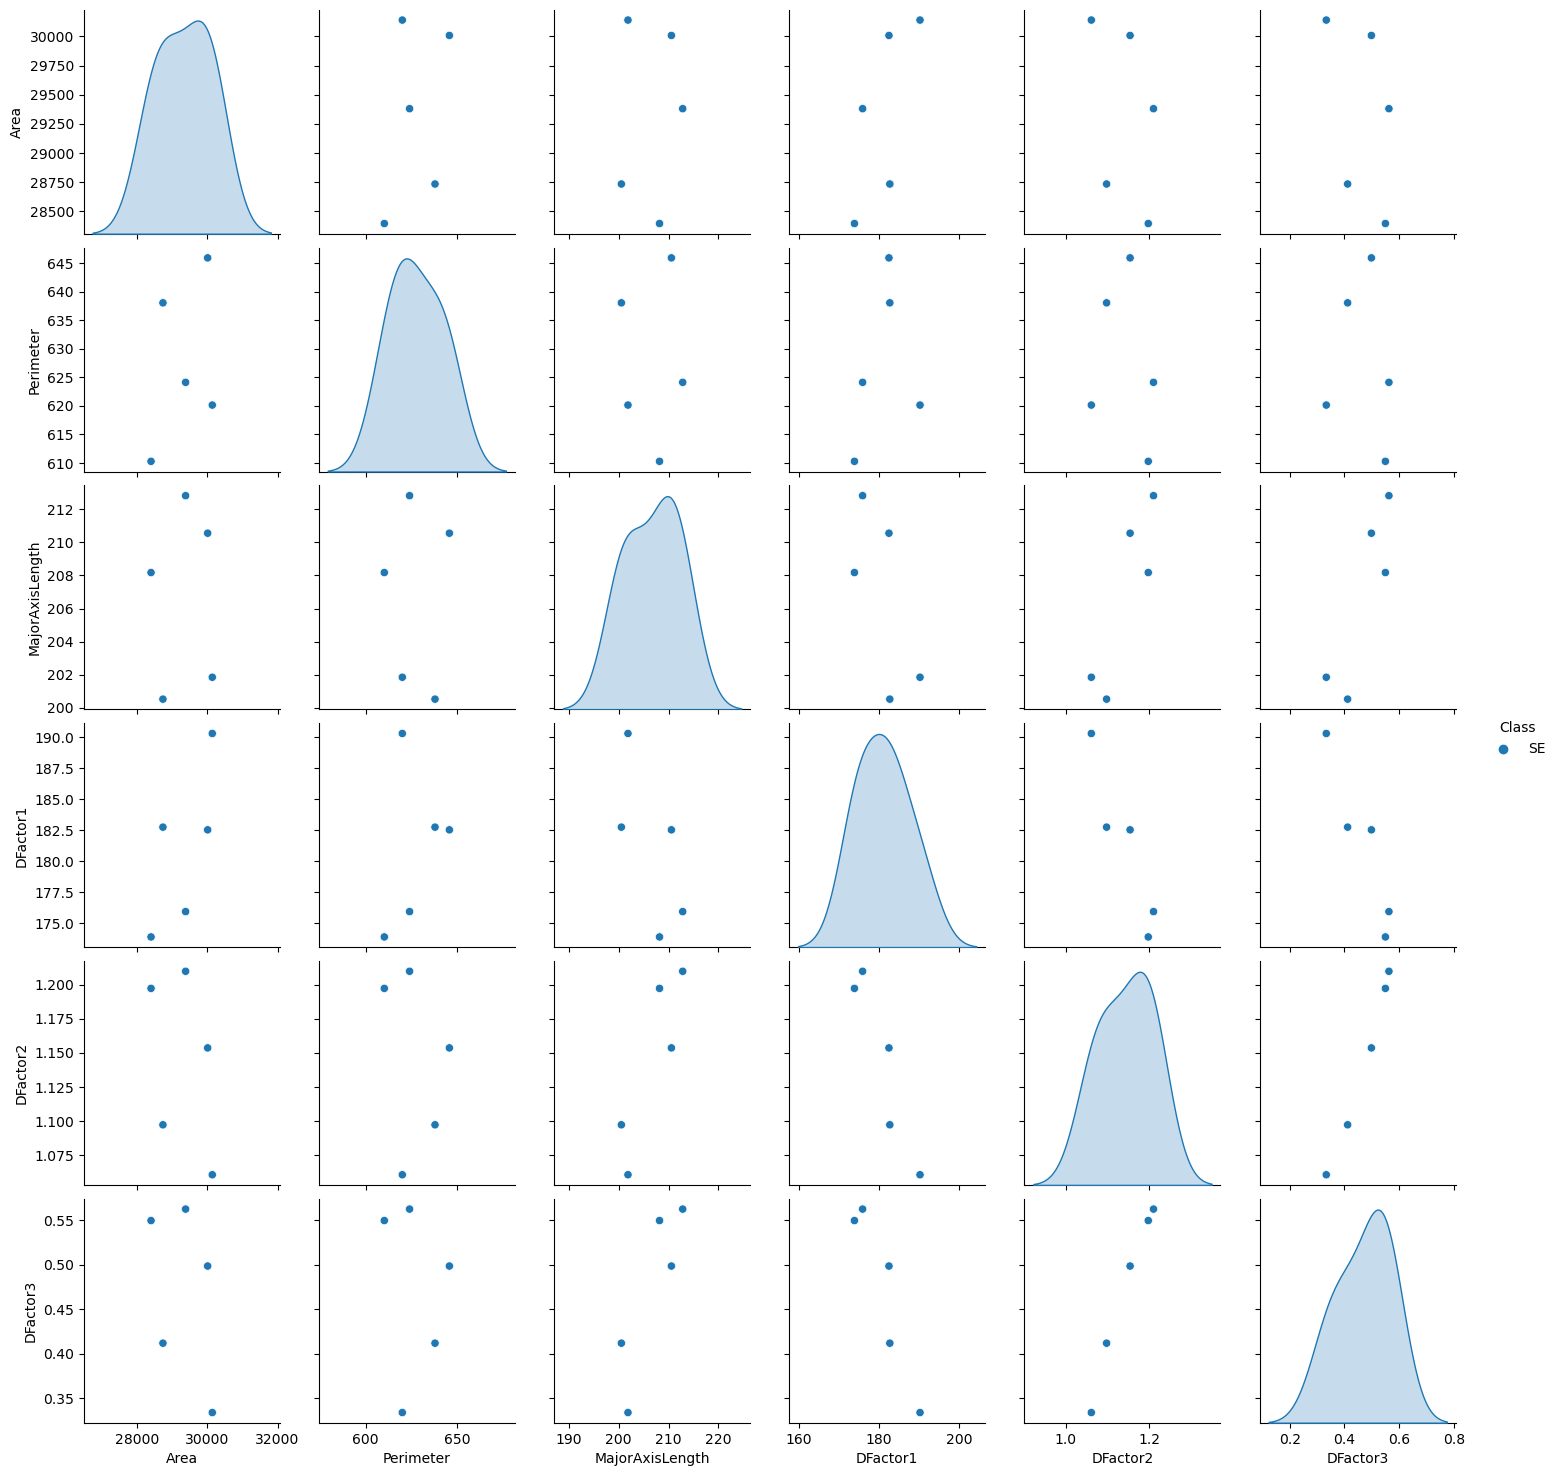

In [36]:
data = pd.DataFrame({
    'Area': [28395, 28734, 29380, 30008, 30140],
    'Perimeter': [610.291, 638.018, 624.110, 645.884, 620.134],
    'MajorAxisLength': [208.178117, 200.524796, 212.826130, 210.557999, 201.847882],
    'DFactor1': [173.888747, 182.734419, 175.931143, 182.516516, 190.279279],
    'DFactor2': [1.197191, 1.097356, 1.209713, 1.153638, 1.060798],
    'DFactor3': [0.549812, 0.411785, 0.562727, 0.498616, 0.333680],
    'Class': ['SE', 'SE', 'SE', 'SE', 'SE']
})

# Create a pairplot with the 'Class' column as the hue
sns.pairplot(data, hue='Class')
plt.show()


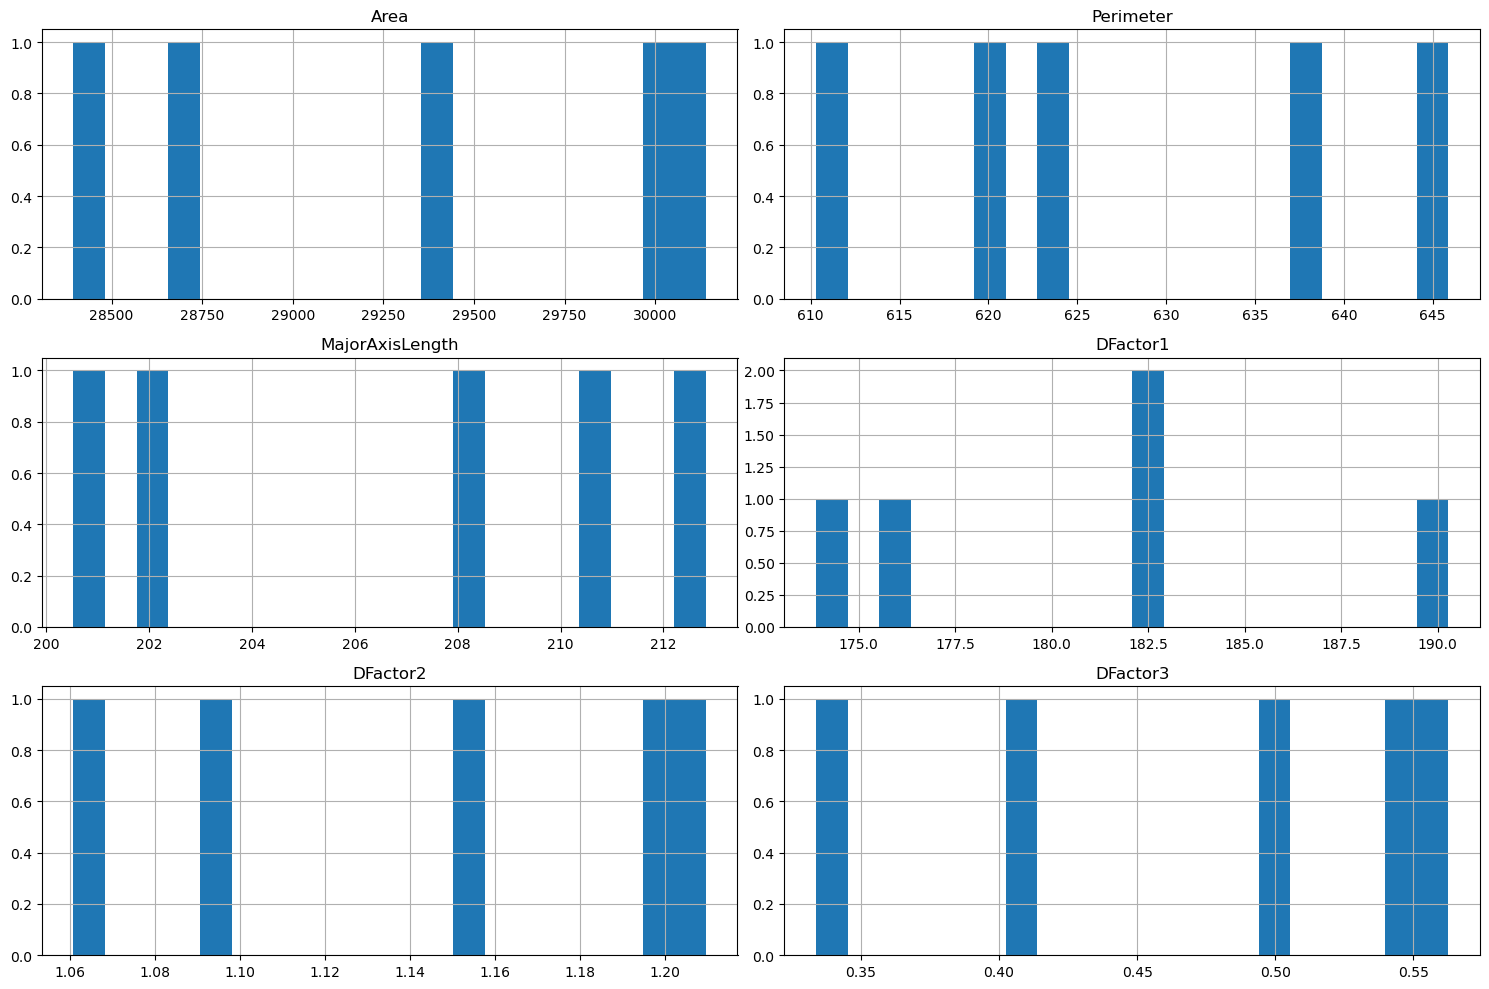

In [38]:
data = pd.DataFrame({
    'Area': [28395, 28734, 29380, 30008, 30140],
    'Perimeter': [610.291, 638.018, 624.110, 645.884, 620.134],
    'MajorAxisLength': [208.178117, 200.524796, 212.826130, 210.557999, 201.847882],
    'DFactor1': [173.888747, 182.734419, 175.931143, 182.516516, 190.279279],
    'DFactor2': [1.197191, 1.097356, 1.209713, 1.153638, 1.060798],
    'DFactor3': [0.549812, 0.411785, 0.562727, 0.498616, 0.333680],
    'Class': ['SE', 'SE', 'SE', 'SE', 'SE']
})

# Now, you can create histograms
data.drop('Class', axis=1).hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

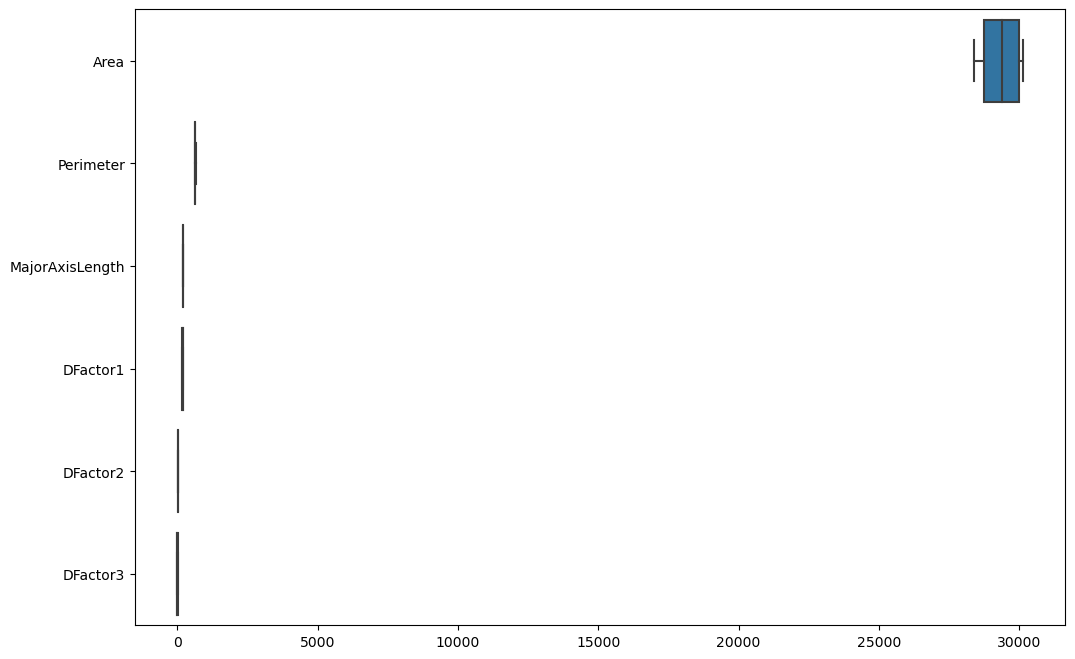

In [39]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data.drop('Class', axis=1), orient='h')
plt.show()

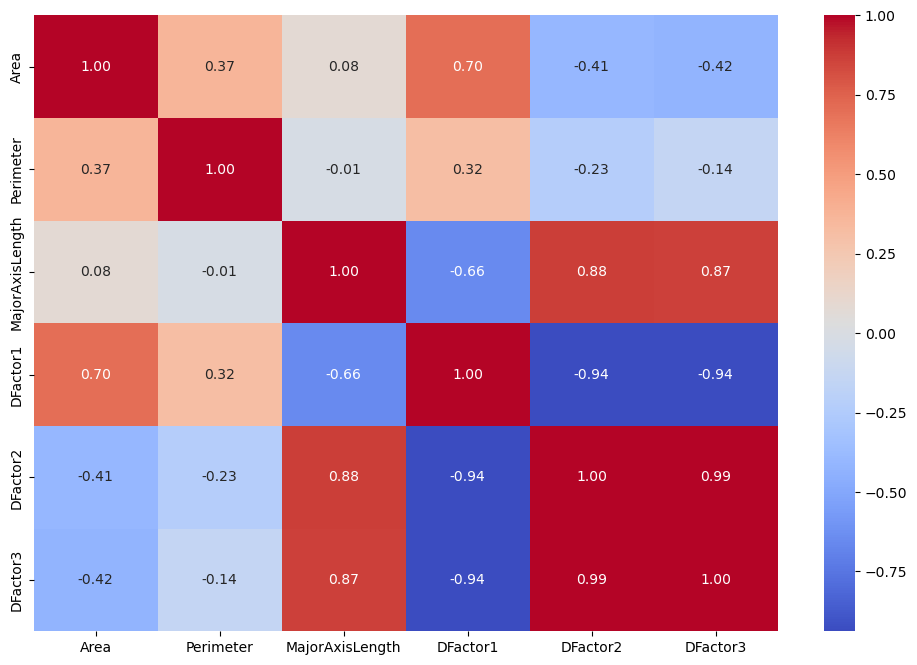

In [40]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

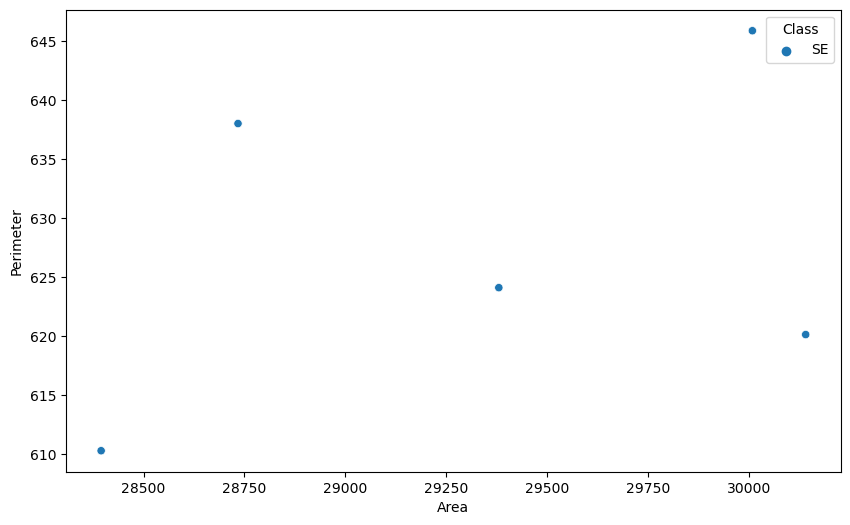

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Area', y='Perimeter', hue='Class')
plt.show()

In [43]:
#Testing Classification Algorithms:

In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming df is a NumPy array
# Convert the NumPy array to a pandas DataFrame with default column names
df = pd.DataFrame(df)

# Drop rows with missing values while keeping the 'Class' column
df.dropna(subset=[1], inplace=True)  # Assuming 'Class' is the last column, use -1 as the index

# Split the data into X and y
X = df.iloc[:, :-1]  # Use all columns except the last column as input features
y = df.iloc[:, -1]  # Use the last column as the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying k-nearest neighbors algorithm
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [46]:
# Initialize classifiers
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()
svm_classifier = SVC()
knn_classifier = KNeighborsClassifier()

In [62]:
# Assuming 'Class' is the categorical column
X_train_ecoded = pd.get_dummies(X_train, columns=['Class'])
X_test_encoded = pd.get_dummies(X_test, columns=['Class'])

In [64]:
import numpy as np
# Identify non-numeric columns
non_numeric_columns = X_train.select_dtypes(exclude=[np.number]).columns

# Apply one-hot encoding to non-numeric columns
X_train_encoded = pd.get_dummies(X_train, columns=non_numeric_columns)
X_test_encoded = pd.get_dummies(X_test, columns=non_numeric_columns)

In [75]:
# Train models
dt_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
#Evaluating the Prediction

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [77]:
# Predictions
y_pred_dt = dt_classifier.predict(X_test)
y_pred_rf = rf_classifier.predict(X_test)
y_pred_svm = svm_classifier.predict(X_test)
y_pred_knn = knn_classifier.predict(X_test)

In [87]:
from sklearn import svm
from sklearn.metrics import classification_report

# Create a linear SVM with L2 regularization
clf = svm.SVC(kernel='linear', C=0.1)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2187
         1.0       1.00      1.00      1.00       536

    accuracy                           1.00      2723
   macro avg       1.00      1.00      1.00      2723
weighted avg       1.00      1.00      1.00      2723



In [ ]:
#Outlier Detection: You can use methods like the Z-score or IQR to detect outliers in your data.

In [89]:
from scipy import stats
import numpy as np

# Calculate Z-scores
z_scores = np.abs(stats.zscore(df))

# Define a threshold to identify outliers
threshold = 3

# Get the positions of the outliers
outliers = np.where(z_scores > threshold)

# Print the outliers
print(df.iloc[outliers])

        2    2    2    2    2    2    2    2    2    2  ...    3         0  \
2027  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  0.0 -0.394273   
2028  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  0.0 -0.394239   
2029  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  0.0 -0.376369   
2030  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  0.0 -0.338515   
2031  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  0.0 -0.337731   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...   
3869  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  6.765460   
3869  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  6.765460   
3870  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  6.874044   
3870  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  6.874044   
3870  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  6.874044   

             1    3         0         1    3         0         

In [91]:
#Class Balancing

In [92]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE()

# Fit SMOTE on the data
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
#Feature Selection/Engineering: 

In [94]:
# Select all features based on mutual information
selector = SelectKBest(mutual_info_classif, k='all')
X_new = selector.fit_transform(X, y)

# Print the selected features
selected_features = pd.DataFrame(selector.inverse_transform(X_new), 
                                 index=X.index, 
                                 columns=X.columns)
selected_columns = selected_features.columns[selected_features.var() != 0]
print(selected_columns)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64')


In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC

# Define your models
models = [
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('Ridge', RidgeClassifier(alpha=0.1)),
    ('SVM', SVC(C=0.1, kernel='linear'))
]

# Evaluate each model with cross-validation
for name, model in models:
    scores = cross_val_score(model, X, y, cv=5)
    print(f'{name} Accuracy: {scores.mean()} (+/- {scores.std() * 2})')

Random Forest Accuracy: 0.7628550219738084 (+/- 0.31075738575057016)
Ridge Accuracy: 0.8127659367787883 (+/- 0.5766272660296063)
SVM Accuracy: 0.8127659367787883 (+/- 0.5766272660296063)


In [ ]:
#Comparing the Methods

In [ ]:
### The cross-validation results show that the Ridge Classifier and SVM models have the highest average accuracy of approximately 0.81,

## but with a high standard deviation of approximately 0.57, indicating a high variability in the accuracy scores across different folds.

## The Random Forest model has a lower average accuracy of approximately 0.76, but also with a high standard deviation of approximately 0.31.

## These results suggest that there might be some instability in the models performance across different subsets of your data.
